In [1]:
import h5py
import torch
from monai.transforms import (
    SpatialCropd,
    Compose,
    RandShiftIntensityd
)

import os
import matplotlib.pyplot as plt
import numpy as np
from monai.transforms import Resized, Compose, LoadImaged, Spacingd, EnsureChannelFirstd, Orientationd, ScaleIntensityRanged, CropForegroundd, SpatialCropd, CenterSpatialCropd, SpatialPadd
import nibabel as nib



# def load_file(input_dict):
    
#     data_dict = {
#         'image': torch.tensor(nib.load(input_dict['image']).get_fdata()), 
#         'label': convert_label(torch.tensor(nib.load(input_dict['label']).get_fdata()))
#     }
#     return data_dict



class Load_File(object):
    """load the file dir dict and convert to actualy file dir"""
    
    def load_file(self, input_dict):
    
        data_dict = {
            'image': torch.tensor(nib.load(input_dict['image']).get_fdata()).unsqueeze(0), 
            'label': convert_label(torch.tensor(nib.load(input_dict['label']).get_fdata())).unsqueeze(0)
        }
        return data_dict

    def __call__(self, input_dict):
        return self.load_file(input_dict)


data_reader = Compose(
    [
        Load_File(),
        # EnsureChannelFirstd(keys=["image", "label"]),
        # Orientationd(keys=["image", "label"], axcodes="RAS"),
        # Spacingd(
        #     keys=["image", "label"],
        #     pixdim=(2.0, 2.0, 3.0),
        #     mode=("bilinear", "nearest"),
        # ),
        # ScaleIntensityRanged(
        #     keys=["image"],
        #     a_min=-125,
        #     a_max=125,
        #     b_min=0.0,
        #     b_max=1.0,
        #     clip=True,
        # ),
        CropForegroundd(keys=["image", "label"], source_key="image"),
        Resized(keys=["image", "label"], spatial_size=(128, 128, 64)),
        
        CenterSpatialCropd(keys=["image", "label"], roi_size=(96, 96, 64)),
        # SpatialCropd(keys=["image", "label"], roi_center=(50, 74, 80) , roi_size=(96, 96, 96)),
        # SpatialPadd(keys=['image', 'label'], spatial_size=(96, 96, 96))
    ]
)



def convert_label(input_label):
    input_label_5 = (input_label == 3).float()
    return input_label_5


def convert_h5(dir, des_dir):
    for img_name in os.listdir(dir):
        # make sure all data are CT data
        if img_name.endswith('img.nii'):
            image_index = img_name[:6]
            img_dir = os.path.join(dir, image_index + '_img.nii')
            label_dir = os.path.join(dir, image_index + '_mask.nii')

            dir_dict = {
                'image' : img_dir,
                'label' : label_dir
            }
            
            print(dir_dict)
            
            loaded_dict = data_reader(dir_dict)
            print(loaded_dict['image'].shape)
            with h5py.File(os.path.join(des_dir, image_index + '.h5'), 'w') as hf:
                hf.create_dataset('image', data=loaded_dict['image'])
                hf.create_dataset('label', data=(loaded_dict['label'] > 0.5).float())



convert_h5('/home/xiangcen/xiaoyao/data_prostate', '/home/xiangcen/xiaoyao/prostate_training/data_prostate_obturator')

{'image': '/home/xiangcen/xiaoyao/data_prostate/006064_img.nii', 'label': '/home/xiangcen/xiaoyao/data_prostate/006064_mask.nii'}
torch.Size([1, 96, 96, 64])
{'image': '/home/xiangcen/xiaoyao/data_prostate/005073_img.nii', 'label': '/home/xiangcen/xiaoyao/data_prostate/005073_mask.nii'}
torch.Size([1, 96, 96, 64])
{'image': '/home/xiangcen/xiaoyao/data_prostate/004045_img.nii', 'label': '/home/xiangcen/xiaoyao/data_prostate/004045_mask.nii'}
torch.Size([1, 96, 96, 64])
{'image': '/home/xiangcen/xiaoyao/data_prostate/003137_img.nii', 'label': '/home/xiangcen/xiaoyao/data_prostate/003137_mask.nii'}
torch.Size([1, 96, 96, 64])
{'image': '/home/xiangcen/xiaoyao/data_prostate/002033_img.nii', 'label': '/home/xiangcen/xiaoyao/data_prostate/002033_mask.nii'}
torch.Size([1, 96, 96, 64])
{'image': '/home/xiangcen/xiaoyao/data_prostate/002078_img.nii', 'label': '/home/xiangcen/xiaoyao/data_prostate/002078_mask.nii'}
torch.Size([1, 96, 96, 64])
{'image': '/home/xiangcen/xiaoyao/data_prostate/0031

tensor([0., 1.])


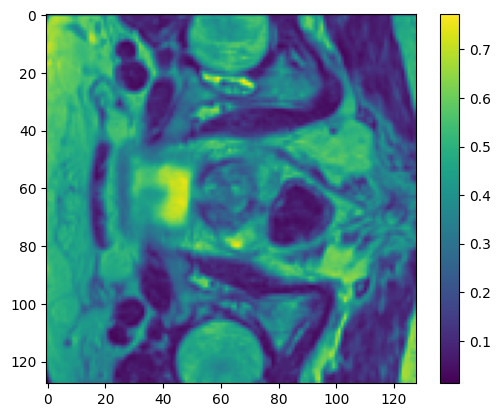

In [2]:
# import h5py
# import torch
# from monai.transforms import (
#     SpatialCropd,
#     Compose,
#     RandShiftIntensityd
# )

# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from monai.transforms import Resized, Compose, LoadImaged, Spacingd, EnsureChannelFirstd, Orientationd, ScaleIntensityRanged, CropForegroundd, SpatialCropd, CenterSpatialCropd, SpatialPadd
# import nibabel as nib


# def h5_to_dict(file_path):
#     h5f = h5py.File(file_path,'r')
#     data_dict = {
#         'image': torch.from_numpy(h5f['image'][:]), 
#         'label': torch.from_numpy(h5f['label'][:])
#     }
#     h5f.close()
#     return data_dict

# class ReadH5d(object):
#     """Convert ndarrays in sample to Tensors."""

#     def __call__(self, file_path):
#         return h5_to_dict(file_path)
    
    
# loader = ReadH5d()

# index = 2020
# data_dir = '/home/xiangcen/xiaoyao/data_prostate_h5/00' + str(index) + '.h5'


# data = loader(data_dir)
# img, label = data['image'], data['label']

# print(torch.unique(label))
# plt.imshow(img[0, :, :, 18])
# plt.colorbar()